<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a current clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitude 1 pA and duration 10 ms. Then do the following:
    

    - inject current at the center and at the end of the soma
    - increase and decrease the number of segments per section
    - manipulate the parameters of the soma (resistance Ra and diameter) and interpret the results


In [1]:
# All the usefull packages
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

--No graphics will be displayed.


# <font color= 'red'>Ex 1:</font> Action Potential Back Propagation. 

<font size='3'> Create a neuron with a soma, an axon with two sections and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma axon and to the dendrite, but not to the branches. You can use the parameters from tutorial 03. 

<font size='3'> Perform a current clamp experiment in which the soma is stimulated at the center and the dendritic branches and axon are recorded at their ends. Choose the best stimulation parameters to see the signal attenuation in the branches, visualize and interpret the results.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the voltage signal propagation from the soma to each of the branches? 
    
<font size='3'>- What happens if the active properties of the dendrite are removed? <font color= 'red'> [1.5 pts]

In [2]:
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t


def tvi_plots(
    t, voltage_records=[], current_records=[], vmax=40, imax=0.5, legendv=True, PlotI=True, xlim=(0,700)
):
    """Plot current and voltage for all stims and recordings"""
    
    # plot the current trace 
    if PlotI==True:
        plt.figure()
        plt.title("currents")
        #plt.ylim((-0.01, imax))
        plt.xlabel("t (ms)")
        plt.ylabel("I (pA)")
        for idict in current_records:
            plt.plot(t, idict["vec"], label=idict["loc"])
        if legendv:
            plt.legend(loc=1)

    plt.figure()
    plt.title("voltages")
    plt.ylim((-80, vmax))
    plt.xlim(xlim)
    plt.ylabel("V (mV)")
    plt.xlabel("t (ms)")
    for vdict in voltage_records:
        plt.plot(t, vdict["vec"], label=vdict["loc"])
    plt.legend(loc=1)


def plot_morphology(fname="cell_01"):
    fname = "{}.swc".format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_morphology(fname)
    view.plot_morph(neuron1)


|-|       soma(0-1)
   `----|       dend(0-1)
         `|       branch_1(0-1)
         `|       branch_2(0-1)
         `|       branch_3(0-1)
 `----|       axon_1(0-1)
       `----|       axon_2(0-1)

Wrote cell 0 to cell_01.swc


cell_01.swc:18:warning



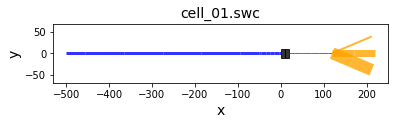

In [3]:
### SOMA 
# Create soma 
soma = h.Section(name="soma")
soma.L = 20  # length (µm)
soma.diam = 20  # diameter (µm)
soma.Ra = 123.0  # axial resistivity (Ω*cm)
soma.cm = 1  # capacitance (µF/cm^2)

# Insert passive properties 
soma.insert("pas")
for seg in soma:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties 
soma.insert("hh")
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

    
### AXON
# Create Axon (blue in plot) 
axon1 = h.Section(name="axon_1")
axon2 = h.Section(name="axon_2")

axon1.diam = 3
axon1.L =50  # length (µm)
axon1.nseg = 5  # diameter (µm)
axon1.Ra = 123.0  # axial resistivity (Ω*cm)
axon1.cm = 1  # capacitance (µF/cm^2)

axon2.diam = 3
axon2.L = 450  # length (µm)
axon2.nseg = 5  # diameter (µm)
axon2.Ra = 123.0  # axial resistivity (Ω*cm)
axon2.cm = 1  # capacitance (µF/cm^2)

# Topology
axon1.connect(soma(0))
axon2.connect(axon1(1))

# Insert passive properties 
axon1.insert("pas")
for seg in axon1:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

axon2.insert("pas")
for seg in axon2:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties 
axon1.insert("hh")
for seg in axon1:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

axon2.insert("hh")
for seg in axon2:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels


### DENDRITE
# Creat Dendrite (red in plot) 
dend = h.Section(name="dend")
dend.L = 100  # length (µm)
dend.diam = 1  # diameter (µm)
dend.nseg = 5  # number of segments
dend.Ra = 123.0  # axial resistivity (Ω*cm)
dend.cm = 1  # capacitance (µF/cm^2)

# Topology
dend.connect(soma(1))

# Passive properties in dendrite and axon
dend.insert("pas")
for seg in dend:
    seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
    seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

# Insert active properties - GET VALUES FROM TUTO 3
dend.insert("hh")
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels


### DENDRITIC BRANCHES
# Create Dendritic Branches (yellow in plot)
branch_1 = h.Section(name="branch_1")
branch_2 = h.Section(name="branch_2")
branch_3 = h.Section(name="branch_3")

# Branch geometry all the same length but diffrent parameters
branch_1.L = 100
branch_1.diam = 2
branch_2.L = 100
branch_2.diam = 7
branch_3.L = 100
branch_3.diam = 12

# Topology
branch_1.connect(dend(1))
branch_2.connect(dend(1))
branch_3.connect(dend(1))

# Passive properties in dendrite branches
branchlst = [branch_1, branch_2, branch_3]
for branch in branchlst:
    branch.Ra = 130.0  # axial resistivity (Ω*cm)
    branch.cm = 1  # capacitance (µF/cm^2)
    branch.insert("pas")
    for seg in branch:
        seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
        seg.pas.e = (-70)   # Leak reversal potential, it influences the steady state membrane potential

plot_morphology("cell_01")

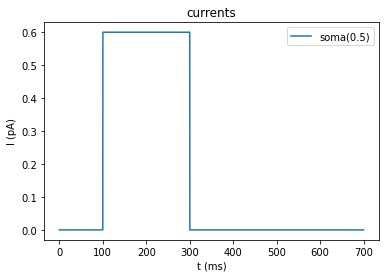

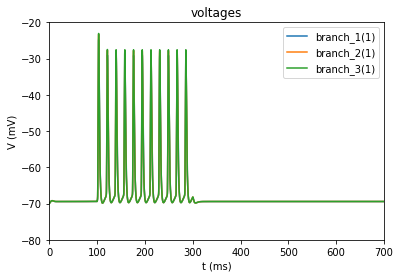

In [4]:
reset()

# Setup stimulations and recordings
# Put current on the middle of the soma
iclamp(soma(0.5), amplitude=0.6, delay=100, duration=200) 

# Record voltage at the end of the dendritic branches
for idx, branch in enumerate(branchlst):
    record_voltage(branch(1))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=-20)

On this first plot, we can see that there is no AP firing, all values are below -20mV. Some interpretation is given on the following question 2.

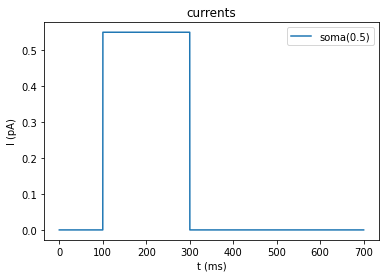

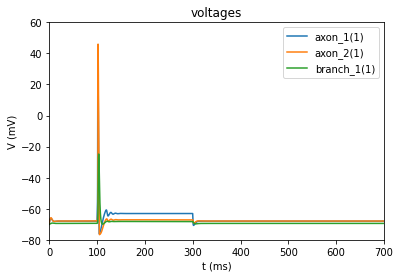

In [6]:
reset()

# Setup stimulations and recordings
# Put current on the middle of the soma
iclamp(soma(0.5), amplitude=0.55, delay=100, duration=200) 

# Record voltage at the end of the axon sections and one dendritic branch (because all same results)
record_voltage(axon1(1))
record_voltage(axon2(1))
record_voltage(branch_1(1))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=60)

In this second recording, the end of the axon_1 (in blue) is at 50µm of the soma thus there is bigger depolarization of the membrane than at 500µm of the soma, the end of the axon_2 (in orange). However the values for the dendritic branch don't go above -20mV (no AP). This reflects the logical theory: the current implanted in the soma goes downwards the axon and not upwards the dendrite and dendritic branches.

<font size='3'> 1. What are passive and active membrane properties?
    
Passive and active membrane properties are the electrical properties of membranes. Neurons have three passive electrical properties that are important for electrical signaling: resting membrane resistance, membrane capacitance, and intracellular axial resistance along axons and dendrites. Passive properties do not involve voltage-gated or synaptically activated ion channels. They refer to the flow of ions due to the difference in ionic concentration between the outside and inside of the cell only via leakage channels, which have a fixed conductance. In contrast, the active properties are due to the active flow of electrons through (mainly) Na+ and K+ channels. These properties are dictated by the dynamics of these channels and are voltage-dependent and responsible for the shape of the AP curve.

<font size='3'> 2. What is going on with the voltage signal propagation from the soma to each of the branches? 

On the first voltage plot above, we look at the voltage at the end of the three dendritic branches. They all have the same length but different diameters. The fact that we obtain three voltage recordings perfectly similar would mean that the diameter doesn't have an impact on the voltage clamp and that the determining factor is the distance from the soma (200 µm here). However, we need to take into account that the current have been implant in the soma and thus will propagate downwards through the axon and not the dendrite (and dendritic branches). That explain why we do not have a full depolarization and stay with values below -20mV (no AP firing).

<font size='3'> 3. What happens if the active properties of the dendrite are removed?

In this exercise we put some current on the center of the soma thus looking at the dendrite wasn't really meaningful. To have some information about the impact of the active properties of the dendrite, we need to applied some current at the extremity of the dendrite `dend(1)` and look at the voltage answer at the center of the dendrite, soma and axon. And repeat this experiemnt after removal of the active properties of the dendrite. See below this new experiment.
    

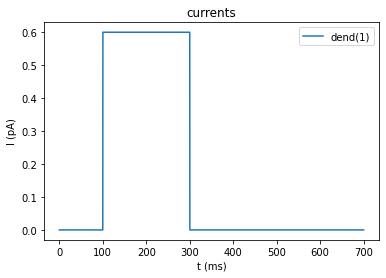

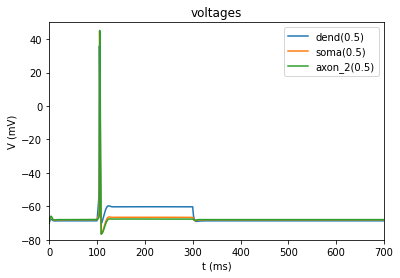

In [6]:
reset()

# Setup stimulations and recordings
# Put current on the middle of the soma
iclamp(dend(1), amplitude=0.6, delay=100, duration=200) 

# Record voltage at the end of the dendritic branches
record_voltage(dend(0.5))
record_voltage(soma(0.5))
record_voltage(axon2(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=50)

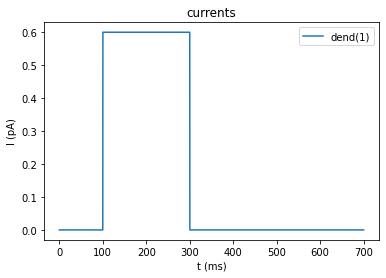

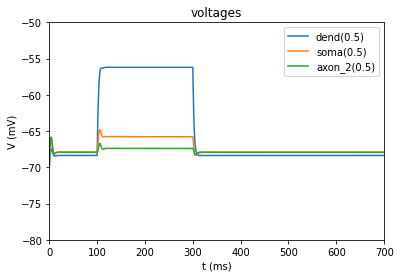

In [7]:
# Remove the active properties of the dendrite
dend.insert("hh")
for seg in dend:
    seg.hh.gkbar = 0.0   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.0  # Maximal conductance of the sodium channels

reset()

# Setup stimulations and recordings
# Put current on the middle of the soma
iclamp(dend(1), amplitude=0.6, delay=100, duration=200) 

# Record voltage at the end of the dendritic branches
record_voltage(dend(0.5))
record_voltage(soma(0.5))
record_voltage(axon2(0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=-50)

On the first plot, with active properties, we can see that an AP is firing on the center of the dendrite, soma and axon ant that the value decrease with the propagation. On the other hand, when we remove the active propeties, we can see that no AP are firing. This experiment allows us to conclude that the remove the active properties of the dendrites will block the formaiton and propagation of an AP and thus the information coming from presynaptique neurons won't be transmitted.

# <font color= 'red'>Ex 2:</font> Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot results of different stimulation protocols that help you explain: 
    
    - What is dendritic signal integration? And, in your opinion, what is the importance of this in biology? 
    - What happens if you stimulate only apical dendrites? What is the cause of this effect?
    
<font size="3"> __Hint:__ use the information on the articles that you can find in the home work folder in the moodle for this week 4. <font color= 'red'> [2.5 pts]

#### For this question, restart your kernel, and run only the import cell and definitions cell.

In [3]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()

    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        # cell = h.Import3d_SWC_read() # We have a .swc morphology file
        cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input("Group3_morphology.asc")

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell, 0)
        self.importedcell.instantiate(None)

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if "soma" in sec.name():
                self.somatic.append(sec)
            if "dend" in sec.name():
                self.dendritic.append(sec)
            if "apic" in sec.name():
                self.apical.append(sec)
            if "axon" in sec.name():
                self.axonal.append(sec)

    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert("pas")
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70

        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.dendritic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.apical:
            # insert hh
            sec.insert("hh")
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.axonal:
            # insert hh
            sec.insert("hh")
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [4]:
Cell = NEURON()


19847 lines read


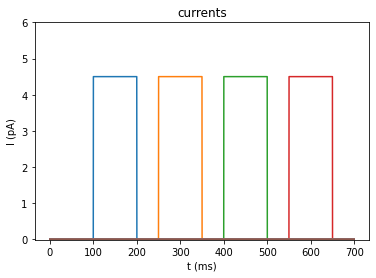

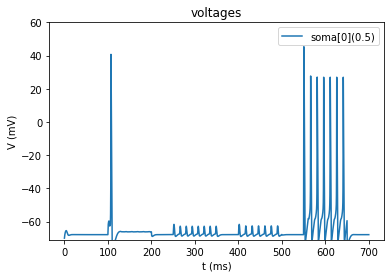

In [5]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx, dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude=4.5, delay=100 + idx * 150, duration=100)
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(
    init_run(v_init, t_stop),
    voltage_records,
    current_records,
    vmax=60,
    imax=6,
    legendv=False,
)

#### First we make the amplitude vary from 2 pA to 10 pA

2
4
6
8
10


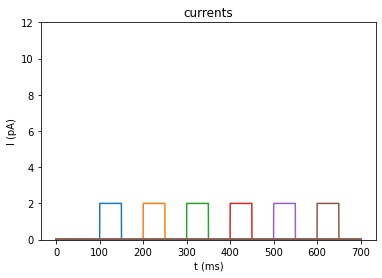

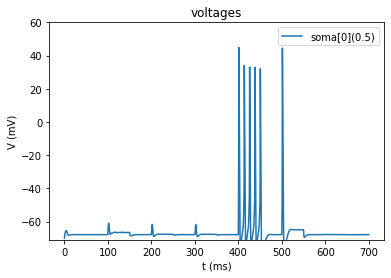

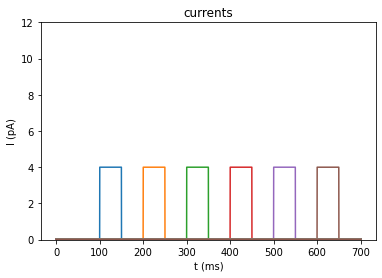

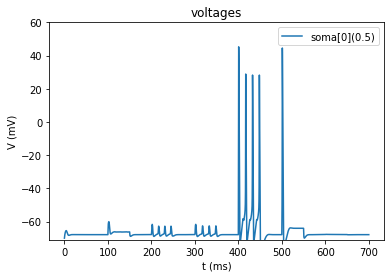

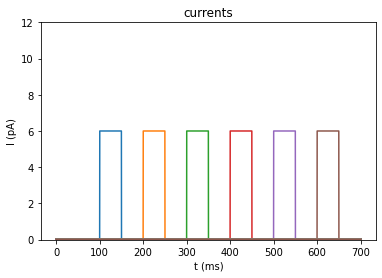

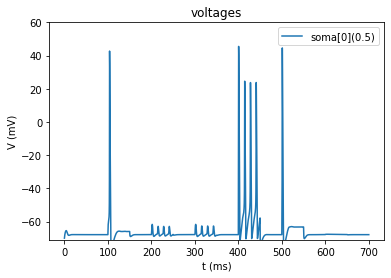

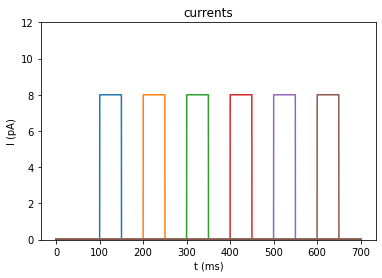

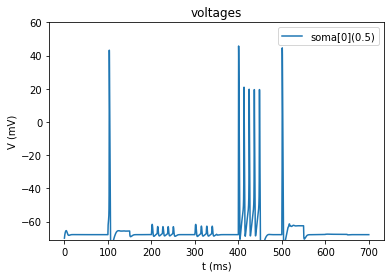

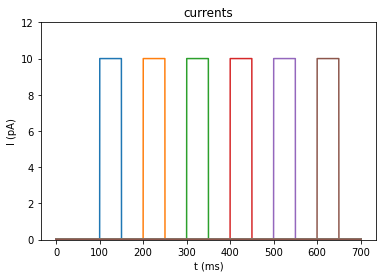

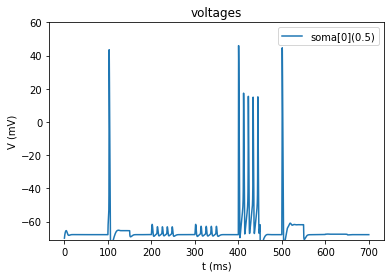

In [7]:
dendrite_list = Cell.dendritic + Cell.apical
amplitudes = np.arange(2, 12, 2, dtype = int)

for amplitude in amplitudes:
    print(amplitude)
    
    reset()

    # Setup stimulations and recordings
    for idx, dendrites in enumerate(dendrite_list):
        iclamp(dendrites(0.5), amplitude=amplitude, delay=100 + idx * 100, duration=50)
    record_voltage(Cell.somatic[0](0.5))
    

    # Simulate and plot
    v_init = -70
    t_stop = 700
    tvi_plots(
        init_run(v_init, t_stop),
        voltage_records,
        current_records,
        vmax=60,
        imax=12,
        legendv=False,
    )

We can see that when the amplitude of the current is not high enough, there is no firing of action potential at the first injection of current but only after a few injections. We can though notice a little depolarizations. However when the amplitude goes above the action potential threshold, the neuron fires when there is the first injection of current, and then it stop firing during the refractory period and fires again after about 300 ms. 

#### Then we make the delay vary from 50 to 250 ms

50
100
150
200


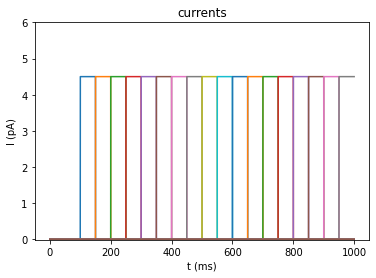

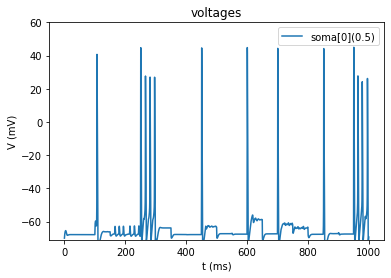

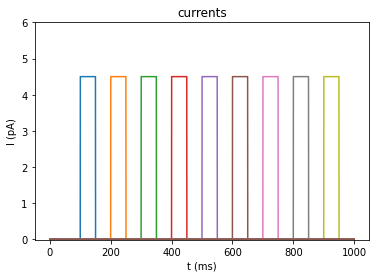

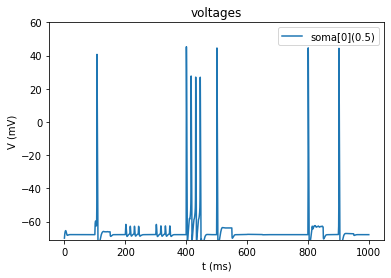

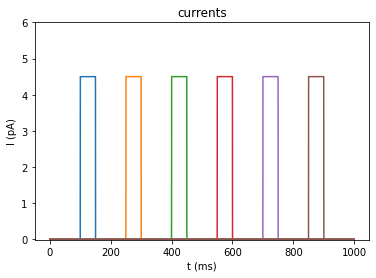

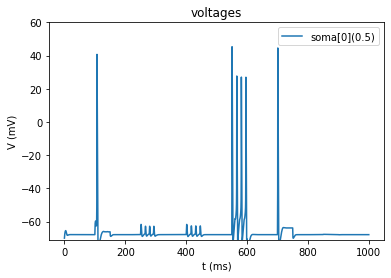

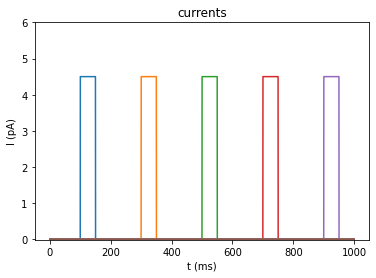

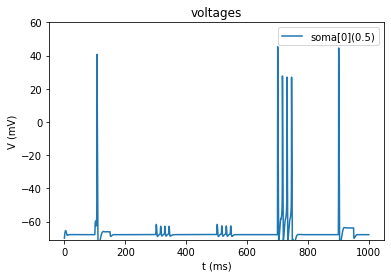

In [7]:
dendrite_list = Cell.dendritic + Cell.apical
delays = np.arange(50, 250, 50, dtype = int)


for delay in delays:
    print(delay)
    
    reset()

    # Setup stimulations and recordings
    for idx, dendrites in enumerate(dendrite_list):
        iclamp(dendrites(0.5), amplitude=4.5, delay=100 + idx * delay, duration=50)
    record_voltage(Cell.somatic[0](0.5))

    # Simulate and plot
    v_init = -70
    t_stop = 1000
    tvi_plots(
        init_run(v_init, t_stop),
        voltage_records,
        current_records,
        vmax=60,
        imax=6,
        legendv=False,
    )

The neuron fires at the first injection of current, and then it fires at the 4th injection, no matter what the delay is. Therefore, if the delay between the different injections of current is shorter, the neuron will spike again sooner. For example, we can see that if the delay is 100 ms, the neuron will be able to fire again at 550 ms, but if the delay is 200 ms, the neuron will fire again after at 700 ms. 

#### And finally we make the duration vary from 50 to 200 ms

50
100
150
200


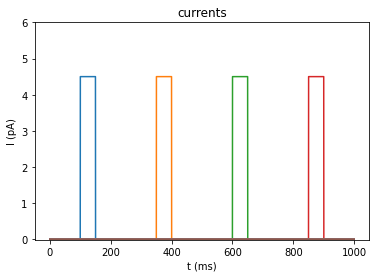

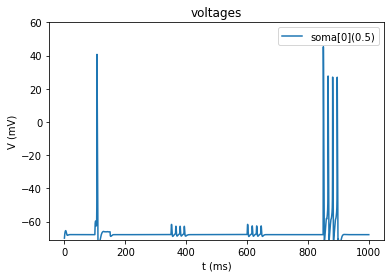

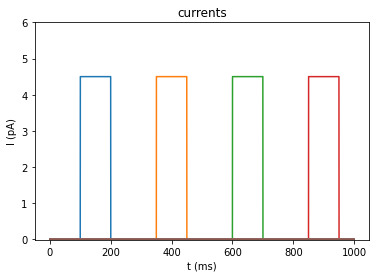

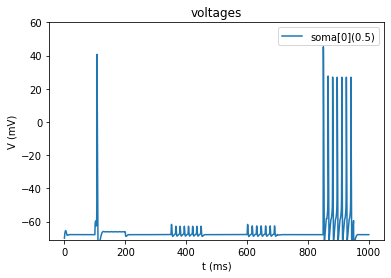

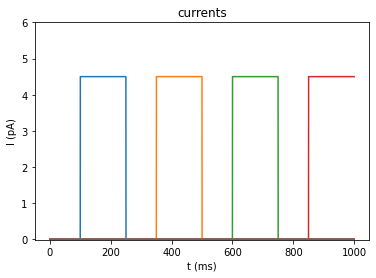

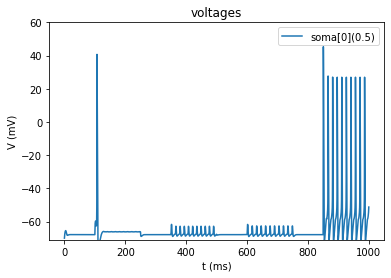

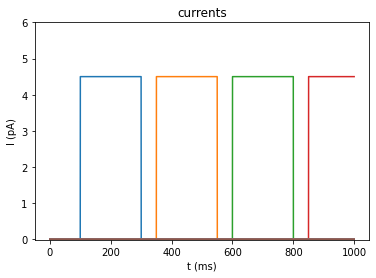

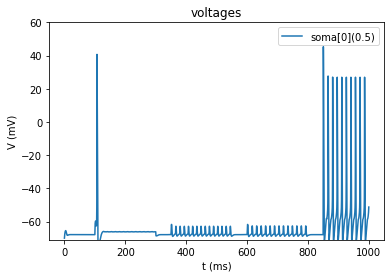

In [6]:
dendrite_list = Cell.dendritic + Cell.apical
durations = np.arange(50, 250, 50, dtype = int)


for duration in durations:
    print(duration)
    
    reset()

    # Setup stimulations and recordings
    for idx, dendrites in enumerate(dendrite_list):
        iclamp(dendrites(0.5), amplitude=4.5, delay=100 + idx * 250, duration=duration)
    record_voltage(Cell.somatic[0](0.5))

    # Simulate and plot
    v_init = -70
    t_stop = 1000
    tvi_plots(
        init_run(v_init, t_stop),
        voltage_records,
        current_records,
        vmax=60,
        imax=6,
        legendv=False,
    )

We can notice that if we increase the duration of the injected current, then the fourth injection leads to an increased number of action potentials fired. 

#### Now we stimulate only the apical dendrites

In [ ]:
reset()

dendrite_list = Cell.apical

# Setup stimulations and recordings
for idx, dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude=4.5, delay=100 + idx * 100, duration=50)
record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(
    init_run(v_init, t_stop),
    voltage_records,
    current_records,
    vmax=60,
    imax=6,
    legendv=False,
)

<font size='3'>- What is dendritic signal integration? And, in your opinion, what is the importance of this in biology? 

Dendritic signal integration is the integration of excitatory or inhibitory electrical inputs that arrive at the synapses, resulting in the firing or not of action potentials. The integration is either active or passive. After the integration of such signals, the information is brought to the soma and to the axon initial segment and depending on the properties of the dendrite, the characteristics of the signal (amplitude, duration, delay, ...) and on the distance of the dendrite from the soma, the neuron will fire an AP or not.  
In our opinion, this process is important because the spiking of action potentials is an all-or-none process and therefore the information must be coded not in the action potential itself but in the number of spikes, their speed, etc. Dendritic integration allows the communication between neurons and the modulation of the response to different signals. 

<font size='3'>- What happens if you stimulate only apical dendrites? What is the cause of this effect?

As seen in the papers, the activation of a synapse on an apical dendrite produces a local EPSP that is larger and faster than the EPSP recorded at more proximal locations, for example on a basal dendrite. In some types of neurons, like the pyramidal ones, there is a higher density of ion channels (mainly potassium and sodium channels) and a lower activation threshold when you increase the distance between the dendrite and the soma. 

# <font color= 'red'>Ex 3:</font> Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instantiate it as it is done in tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<!-- <font size="3"> -->
    - What would you expect in terms of attenuation? 
    - Would you expect the signal to be more attenuated in the axon or in the dendrites and why? 
    - Which neurite properties does attenuation depend on?
    
    
<font color= 'red'>[2 pts]
    

#### For this question, restark your kernel, and run only the import cell, definitions cell and the class NEURON cell.

Below, we show the signal propagation along the dendrites and the axons respectively when the same current is applied on the soma. Both signals are compared in order to detect which signal is attenuated and which one is not.


In terms of attenuation, we expect the signal to be more attenuated in the axons than in the dendrites. Indeed, starting from the soma, the potential will decrease as it travels along the axon. The reason for that is the leak of the current through small passive "holes" placed in the membrane all along the axon. In opposition, this is not observed in the dendrites, where the back propagation signal is amplified.
Thus, this phenomenon depends on the passive membrane properties of the neurite.

In [4]:
Cell = NEURON()


19847 lines read


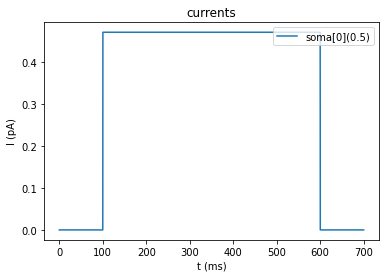

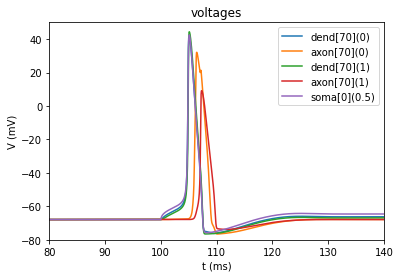

In [5]:
reset()

# Scan at different locations with different delays
locations = np.linspace(0, 1, 2)

# Setup stimulations and recordings
iclamp(Cell.somatic[0](0.5), delay = 100, amplitude = 0.47, duration = 500)


# dendritic propagation
for p in locations:
    record_voltage(Cell.dendritic[70](p))
    record_voltage(Cell.axonal[70](p))

record_voltage(Cell.somatic[0](0.5))

    
# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=50, xlim=(80, 140))

The above plot allows us to compare the potential of the neurites with he potential of the soma, where the current was injected. We clearly see that the potential in the axons is lower than in the soma. Additionally, we observe that the potential is constant from the soma to the dendrites. This is the result we expected.  
In the plot below, the difference of signal propagation is highlighted between the dendrites and the axons. 

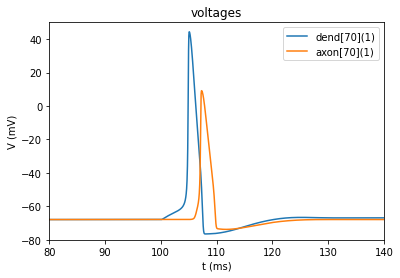

In [6]:
# plot only dendrites and axons
reset()

# Setup stimulations and recordings
iclamp(Cell.somatic[0](0.5), delay = 100, amplitude = 0.47, duration = 500)


# dendritic propagation
record_voltage(Cell.dendritic[70](1))
record_voltage(Cell.axonal[70](1))

# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(init_run(v_init, t_stop), voltage_records, current_records, vmax=50, xlim=(80, 140), PlotI=False)